In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os

import sys 
sys.path.append("..") 
import add_mypathlevy

In [10]:
def load_results(dx_coarse, dx, dt, N, supp_u,t_range, kernel_type, scale_value, method_our):
    datafolder = os.path.join(add_mypathlevy.data_folder, f"FDM{method_our}_sinx_dx_coarse{dx_coarse}_dx{dx}_dt{dt}_N{N}_supp_u{supp_u[-1]}_t_range{t_range[-1]}_kernel_type{kernel_type}")
    Data_set = np.load(os.path.join(datafolder, f"bikernel_data_scale{scale_value}.npz"),allow_pickle=True)
    Loss_set = np.load(os.path.join(datafolder, f"bikernel_loss_scale{scale_value}.npz"),allow_pickle=True)
    G_set = np.load(os.path.join(datafolder, f"bikernel_Gbar_scale{scale_value}.npz"),allow_pickle=True)
    UF_set = np.load(os.path.join(datafolder, f"bikernel_uxfx_scale{scale_value}.npz"),allow_pickle=True)
    Lnorm_set = np.load(os.path.join(datafolder, f"bikernel_L2l2{scale_value}.npz"),allow_pickle=True)
    return Data_set, Loss_set, G_set,UF_set, Lnorm_set

In [11]:
dx = 0.005# space mesh size for generating data
N = 30 # number of data pairs (u_i, f_i);
u_Type = 'Compoundpdf'  # types: 'Bspline', 'Fourier','Compoundpdf',Laplacepdf; Fourier works for mfOpt, which requires derivatives of u.
x_range = [-5, 5] # space range
dt = 0.000025 # time mesh size in CFL condition
t_range = [0, 1] # time range
example_type = 'nonlocal'  # {'LinearIntOpt', 'nonlocal', 'mfOpt'}
kernel_type = 'Compoundlevy'  # Gaussian, sinkx, FracLap,Compoundlevy,Laplacejump
scale_value = 1
method_our = 'BiSNGD'
supp_u = [0,2]

In [12]:
dx_coarse1 = 0.01
dataset1, lossset1, Gset1, UFset1, Lnorm_set1 = load_results(dx_coarse1,dx, dt, N, supp_u,t_range, kernel_type, scale_value, method_our)
r_seq1 = dataset1["r_seq"]
x_reg61 = dataset1["x_reg6"]
x_reg41 = dataset1["x_reg4"]
x_reg71 = dataset1["x_reg7"]
x_reg81 = dataset1["x_reg8"]
x_reg91 = dataset1["x_reg9"]
K_true_val1 = dataset1["K_true_val"]

iteration_history1 = lossset1["iteration_history"]
loss_history1 = lossset1["loss_history"]
error_history1 = lossset1["error_history"]
relative_err1 = lossset1["relative_err"]
relative_errL1 = lossset1["relative_errL"]
gamma_history1 = lossset1["gamma_history"]

G_bar1 = Gset1["G_D1"]
xreg7_history1 = Gset1["xreg7_history"]
rho_val1 = Gset1["rho_val"]


x_reg7L1 = Lnorm_set1['x_reg7L']
x_reg7l1 = Lnorm_set1['x_reg7l']

In [13]:
print("relative_err",relative_err1)

relative_err [['auto-RKHS-iDarr' 0.010795843752479092]
 ['Gbar-Tikh' 0.3278754107706396]
 ['Gaussian-iDarr' 0.005828854037293598]
 ['auto-RKHS-LC' 0.3417061627180207]
 ['Gaussian-RKHS-LC' 0.2754672412304826]
 ['Gbar-LC' 0.3278754107706396]
 ['Gbar-GCV' 0.009039570179074722]
 ['auto-RKHS-GCV' 0.3417061627180207]
 ['Gbar-Bilevel' 0.009041650187872733]]


In [14]:
print("relative_err",relative_errL1)

relative_err [['Gbar-LC-RKHS' 0.3278754107706396]
 ['Gbar-GCV-RKHS' 0.009039570179074722]
 ['Gbar-Bilevel-RKHS' 0.009041650187872733]
 ['Gbar-LC-L2' 0.01442714664361338]
 ['Gbar-LC-l2' 0.329508006440702]
 ['Gbar-GCV-L2' 0.010304022080024226]
 ['Gbar-GCV-l2' 0.009058474450678857]
 ['Gbar-Bilevel-L2' 0.009995195824140893]
 ['Gbar-Bilevel-l2' 0.009732366240293704]]


In [15]:
log10_loss1 = [np.log10(loss) for loss in loss_history1]
log10_error1 = [np.log10(error) for error in error_history1]

In [16]:
gamma6   = np.log10(dataset1['reg6_corner'].item()).round(2)
gamma8   = np.log10(dataset1['reg8_corner'].item()).round(2)
gamma4   = np.log10(dataset1['reg4_corner'].item()).round(2)
gamma9   = np.log10(dataset1['reg9_corner'].item()).round(2)
gamma7   = np.log10(dataset1['reg7_corner'].item()).round(2)

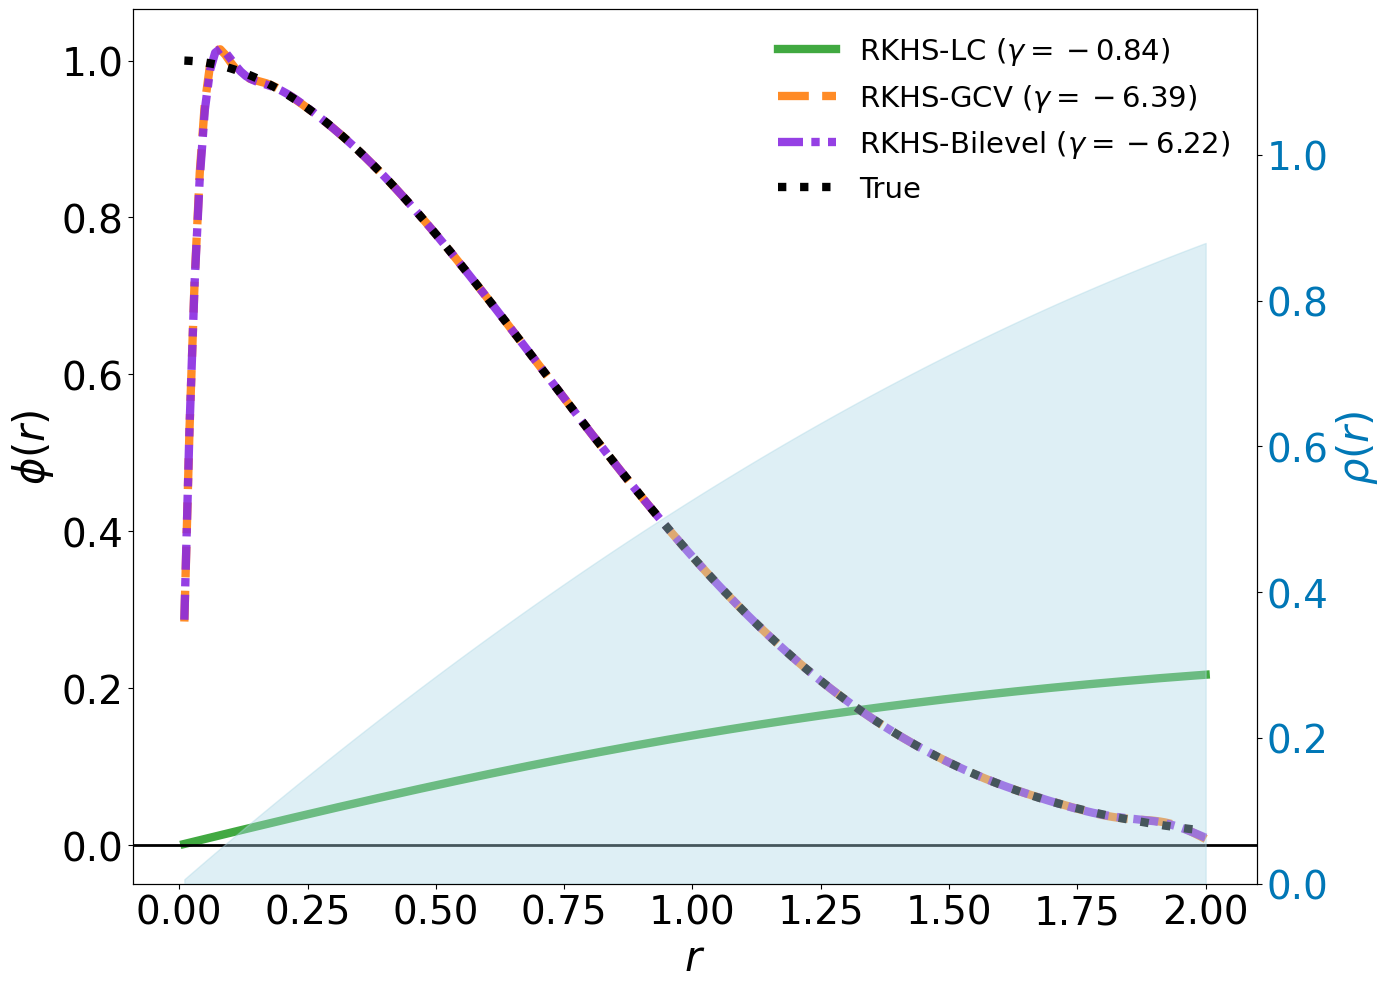

In [17]:
# Increase figure size for better spacing
fig, ax1 = plt.subplots(figsize=(14, 10))

# Define colors and styles for all six estimator curves
colors = plt.get_cmap('tab10').colors
estimator_colors = list(colors[:5]) + ['#000000']

linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), ':']  # Various dash styles

# Increase linewidth for better visibility
linewidth_value = 6  # Increased linewidth for clear visualization

# Plot all six estimator curves
ax1.plot(r_seq1, x_reg61, color=estimator_colors[2], linestyle=linestyles[0],
         linewidth=linewidth_value, alpha=0.9,
         label=f"RKHS-LC ($\\gamma={gamma6}$)")
ax1.plot(r_seq1, x_reg81, color=estimator_colors[1], linestyle=linestyles[1],
         linewidth=linewidth_value, alpha=0.9,
         label=f"RKHS-GCV ($\\gamma={gamma8}$)")
# ax1.plot(r_seq1, x_reg41, color=estimator_colors[2], linestyle=linestyles[2],
#          linewidth=linewidth_value, alpha=0.9,
#          label=f"auto-RKHS-LC ($\\gamma={gamma4}$)")
# ax1.plot(r_seq1, x_reg91, color=estimator_colors[3], linestyle=linestyles[3],
#          linewidth=linewidth_value, alpha=0.9,
#          label=f"auto-RKHS-GCV ($\\gamma={gamma9}$)")
ax1.plot(r_seq1, x_reg71, color="#8A2BE2", linestyle=linestyles[4],
         linewidth=linewidth_value, alpha=0.9,
         label=f"RKHS-Bilevel ($\\gamma={gamma7}$)")
ax1.plot(r_seq1, K_true_val1, color=estimator_colors[5], linestyle=linestyles[5],
         linewidth=linewidth_value, alpha=1.0, label="True")

ax1.axhline(y=0, color='black', linewidth=2)

# Secondary y-axis for rho(r)
ax2 = ax1.twinx()
ax2.fill_between(r_seq1, 0, rho_val1, color='#add8e6', alpha=0.4)  # Light blue shaded region for rho(r)

# Formatting for axes
ax1.set_xlabel(r'$r$', fontsize=30, fontweight='bold')
ax1.set_ylabel(r'$\phi(r)$', fontsize=30, fontweight='bold')
ax2.set_ylabel(r'$\rho(r)$', fontsize=30, fontweight='bold', color='#0077b6')

# **Set secondary y-axis range to [0,1.2] but show ticks only from [0,1]**
ax2.set_ylim(0, 1.2)
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Show ticks only up to 1

# Increase tick size to match the larger figure
ax1.tick_params(axis='x', labelsize=28)
ax1.tick_params(axis='y', labelsize=28)
ax2.tick_params(axis='y', labelsize=28, labelcolor='#0077b6')

# Improve grid visibility
#ax1.grid(True, linestyle='--', alpha=0.6)

# Adjust legend position **without a box**
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, frameon=False, loc="upper right", fontsize=21)

# Ensure tight layout
plt.tight_layout()  # Leaves extra space for the legend

# Save figure in EPS format with high resolution
figure_path = os.path.join(add_mypathlevy.figure_folder, f"Sinx{kernel_type}estimatorsRhodx{dx_coarse1}N{N}.pdf")
plt.savefig(figure_path, bbox_inches='tight', dpi=500)

plt.show()

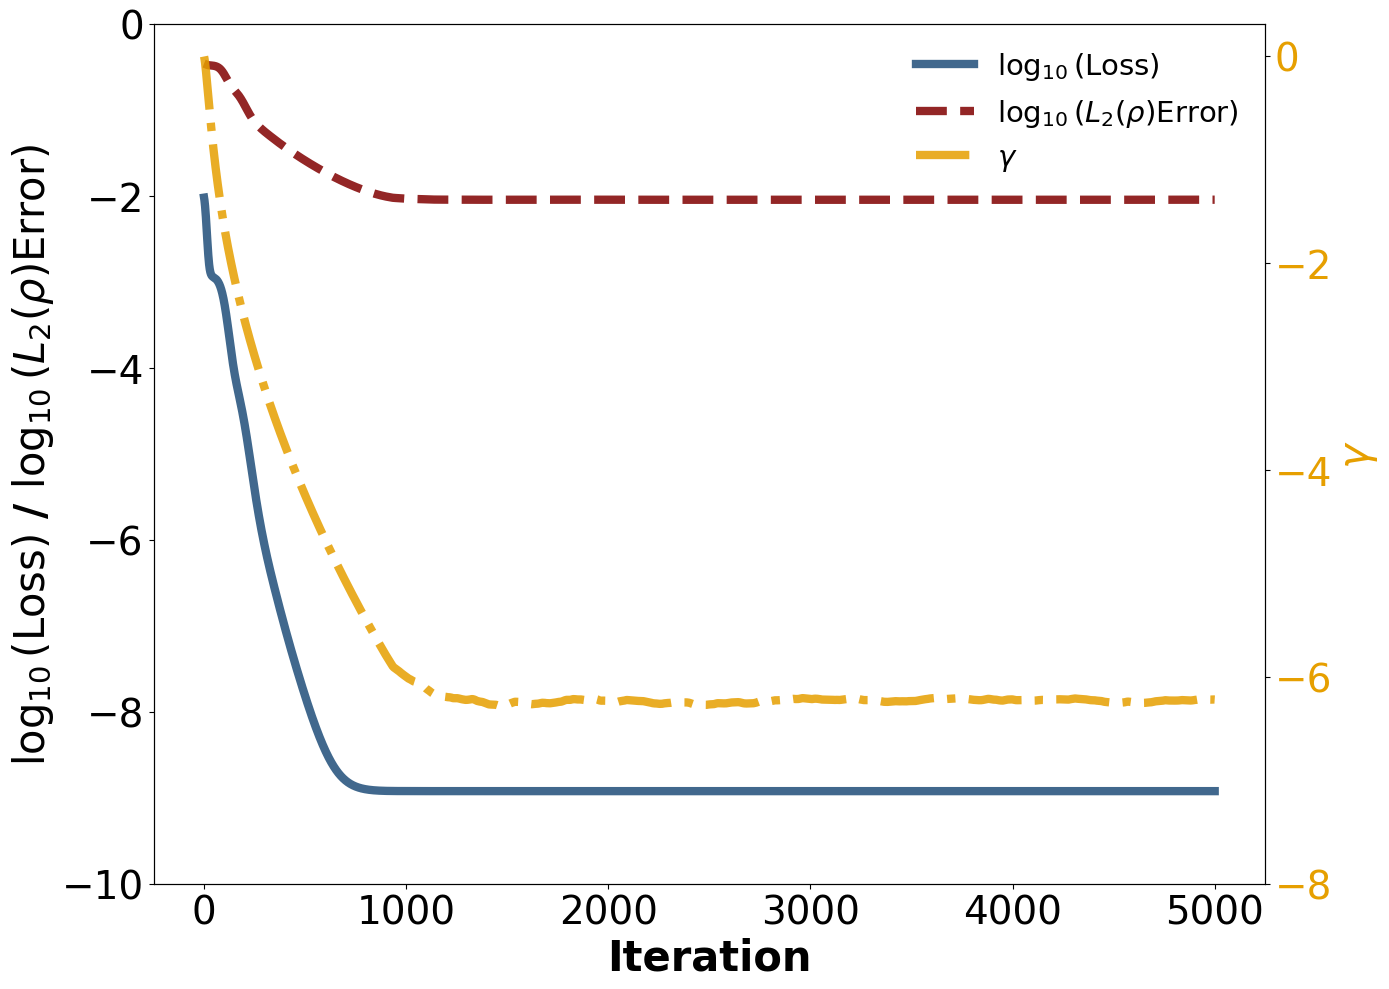

In [18]:
# Increase figure size for better readability
fig, ax1 = plt.subplots(figsize=(14, 10))

# Define improved academic-style colors
loss_color = '#1f4e79'  # Deep Royal Blue for Loss
gamma_color = '#e69f00'  # Warm Golden for Gamma
error_color = '#800000'
# Plot Loss on primary y-axis
ax1.plot(iteration_history1, log10_loss1, label=r'$\log_{10}(\mathrm{Loss})$', color=loss_color, linestyle='-', linewidth=6, alpha=0.85)
ax1.plot(iteration_history1, log10_error1, label=r'$\log_{10}(L_2(\rho)\mathrm{Error})$',color=error_color, linestyle='--', linewidth=6, alpha=0.85)
# Secondary y-axis for Gamma
ax2 = ax1.twinx()
ax2.plot(iteration_history1, gamma_history1, label=r'$\gamma$', color=gamma_color, linestyle='-.', linewidth=6, alpha=0.85)
# Labels and formatting
ax1.set_xlabel('Iteration', fontsize=30, fontweight='bold')
ax1.set_ylabel(r'$\log_{10}(\mathrm{Loss})$ / $\log_{10}(L_2(\rho)\mathrm{Error})$', fontsize=30, fontweight='bold')
ax2.set_ylabel(r'$\gamma$', fontsize=30, fontweight='bold', color=gamma_color)

y1min, y1max = ax1.get_ylim()
ticks1 = np.arange(-10,1,2)
ax1.set_yticks(ticks1)

ticks2 = np.arange(-8,2,2)
ax2.set_yticks(ticks2)

# Set tick sizes for consistency
ax1.tick_params(axis='x', labelsize=28)
ax1.tick_params(axis='y', labelsize=28)
ax2.tick_params(axis='y', labelsize=28, labelcolor=gamma_color)

# Improve grid visibility
# ax1.grid(True, linestyle='--', linewidth=1, alpha=0.5)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg =ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc="upper right", fontsize=21)

leg.set_zorder(100) 
# Ensure tight layout
plt.tight_layout()
# 如需保存图片，请取消下面注释，并指定保存路径 
figure_path = os.path.join(add_mypathlevy.figure_folder, f"Sinx{kernel_type}LossErrorGammadx{dx_coarse1}N{N}.pdf")
plt.savefig(figure_path, bbox_inches='tight', dpi=500)
# Show the final combined figure
plt.show()

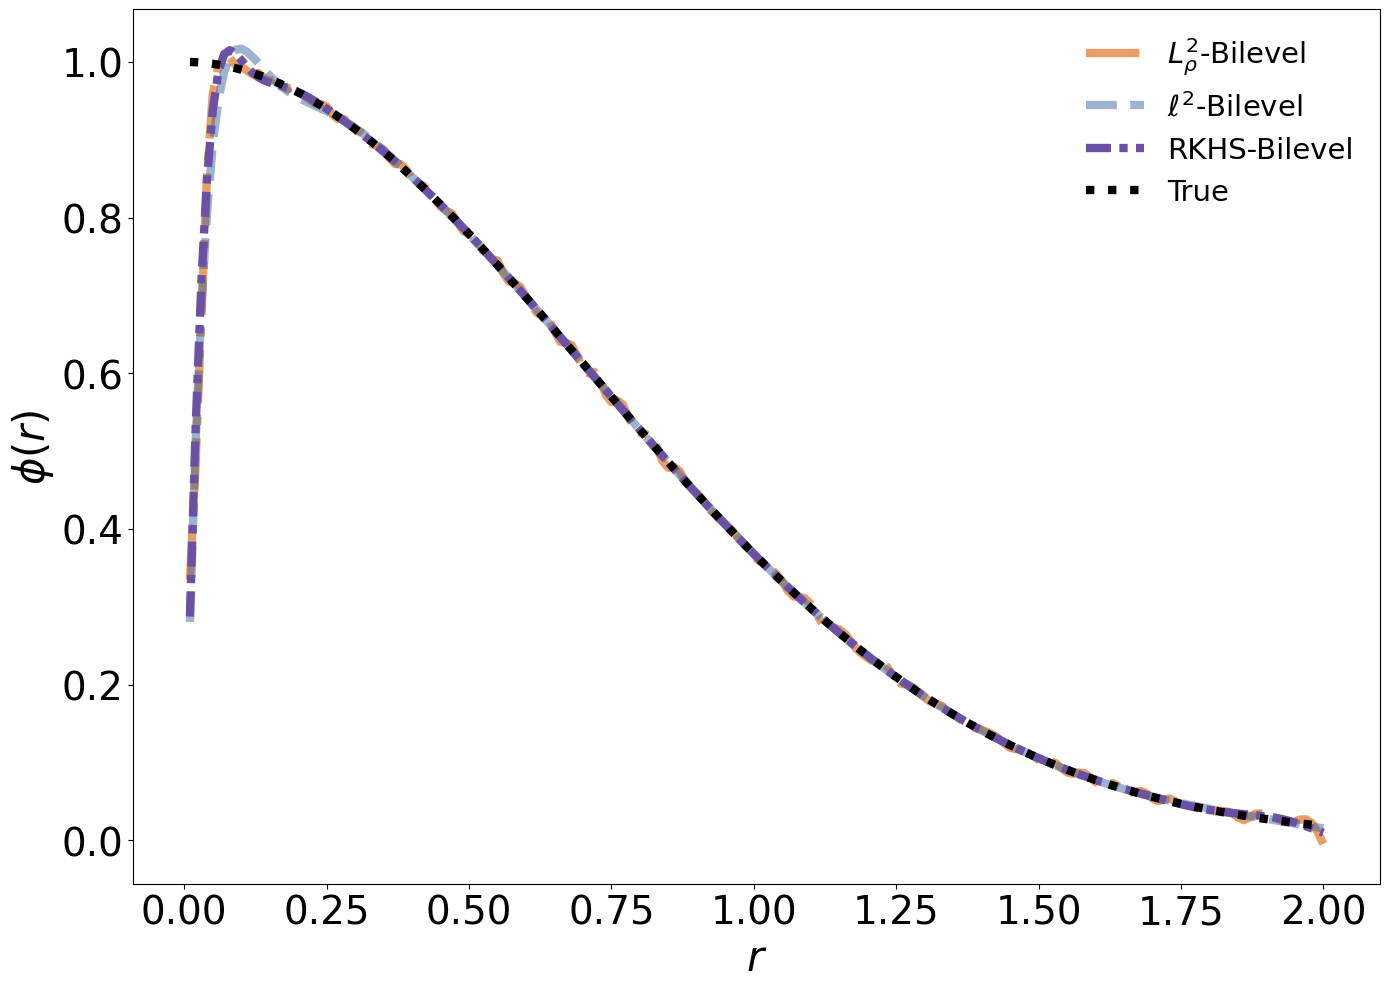

In [19]:
from matplotlib.ticker import FormatStrFormatter

# 保持原有画布、刻度和图例大小
plt.rcParams.update({
    "figure.figsize": (14, 10),
    "xtick.labelsize": 28,
    "ytick.labelsize": 28,
    "legend.fontsize": 21,
})

fig, ax = plt.subplots()

# 固定为紫色系的三条曲线（True 仍为黑色）
sgd_rkhs_color = '#6a51a3'   # 深紫（SGD‑RKHS）
sgd_l2_color   = '#d95f02'   # 橙红（SGD‑L2）
sgd_l2l_color  = '#3e68a0'   # 青蓝（SGD‑l2）
true_color     = '#000000'   # 黑色（True）

# 绘制各方法曲线
ax.plot(r_seq1, x_reg7L1,  color=sgd_l2_color,   linestyle='-.', linewidth=6, label=r'$L^2_{\rho}$-Bilevel', alpha=0.6)
ax.plot(r_seq1, x_reg7l1,  color=sgd_l2l_color,  linestyle='--',  linewidth=6, label=r'$\ell^2$-Bilevel', alpha=0.5)
ax.plot(r_seq1, x_reg71,   color=sgd_rkhs_color, linestyle=(0, (3, 1, 1, 1)),  linewidth=6, label='RKHS-Bilevel')
ax.plot(r_seq1, K_true_val1, color=true_color,   linestyle=':',  linewidth=6, label='True')

# 美化网格
xticks = np.arange(0, np.max(r_seq1)+ 0.25, 0.25)
ax.set_xticks(xticks)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# 坐标轴标签
ax.set_xlabel(r'$r$', fontsize=30, fontweight='bold')
ax.set_ylabel(r'$\phi(r)$', fontsize=30, fontweight='bold')

# 图例
ax.legend(frameon=False, loc='upper right')

figure_path = os.path.join(add_mypathlevy.figure_folder, f"Sinx{kernel_type}estimatorsNormdx{dx_coarse1}N{N}.pdf")
plt.savefig(figure_path, bbox_inches='tight', dpi=500)

plt.tight_layout()
plt.show()

In [20]:
dx_coarse2 = 0.02
dataset2, lossset2, Gset2, UFset2, Lnorm_set2 = load_results(dx_coarse2,dx, dt, N, supp_u,t_range, kernel_type, scale_value, method_our)
r_seq2 = dataset2["r_seq"]
x_reg62 = dataset2["x_reg6"]
x_reg42 = dataset2["x_reg4"]
x_reg72 = dataset2["x_reg7"]
x_reg82 = dataset2["x_reg8"]
x_reg92 = dataset2["x_reg9"]
K_true_val2 = dataset2["K_true_val"]

iteration_history2 = lossset2["iteration_history"]
loss_history2 = lossset2["loss_history"]
error_history2 = lossset2["error_history"]
relative_err2 = lossset2["relative_err"]
relative_errL2 = lossset2["relative_errL"]
gamma_history2 = lossset2["gamma_history"]

G_bar2 = Gset2["G_D1"]
xreg7_history2 = Gset2["xreg7_history"]
rho_val2 = Gset2["rho_val"]


x_reg7L2 = Lnorm_set2['x_reg7L']
x_reg7l2 = Lnorm_set2['x_reg7l']

log10_loss2 = [np.log10(loss) for loss in loss_history2]
log10_error2 = [np.log10(error) for error in error_history2]

In [21]:
print("relative_err",relative_err2)

relative_err [['auto-RKHS-iDarr' 0.014395174391971022]
 ['Gbar-Tikh' 0.01780681494486204]
 ['Gaussian-iDarr' 0.013728937357188454]
 ['auto-RKHS-LC' 0.34103348889742974]
 ['Gaussian-RKHS-LC' 0.2744963748278612]
 ['Gbar-LC' 0.01780681494486204]
 ['Gbar-GCV' 0.08006814209681364]
 ['auto-RKHS-GCV' 0.34103348889742974]
 ['Gbar-Bilevel' 0.019676924678588538]]


In [22]:
dx_coarse3 = 0.025
dataset3, lossset3, Gset3, UFset3, Lnorm_set3 = load_results(dx_coarse3,dx, dt, N, supp_u,t_range, kernel_type, scale_value, method_our)
r_seq3 = dataset3["r_seq"]
x_reg63 = dataset3["x_reg6"]
x_reg43 = dataset3["x_reg4"]
x_reg73 = dataset3["x_reg7"]
x_reg83 = dataset3["x_reg8"]
x_reg93 = dataset3["x_reg9"]
K_true_val3 = dataset3["K_true_val"]

iteration_history3 = lossset3["iteration_history"]
loss_history3 = lossset3["loss_history"]
error_history3 = lossset3["error_history"]
relative_err3 = lossset3["relative_err"]
relative_errL3 = lossset3["relative_errL"]
gamma_history3 = lossset3["gamma_history"]

G_bar3 = Gset3["G_D1"]
xreg7_history3 = Gset3["xreg7_history"]
rho_val3 = Gset3["rho_val"]

x_reg7L3 = Lnorm_set3['x_reg7L']
x_reg7l3 = Lnorm_set3['x_reg7l']

log10_loss3 = [np.log10(loss) for loss in loss_history3]
log10_error3 = [np.log10(error) for error in error_history3]

In [23]:
print("relative_err",relative_err3)

relative_err [['auto-RKHS-iDarr' 0.017166524805082697]
 ['Gbar-Tikh' 0.02103623376023235]
 ['Gaussian-iDarr' 0.01765500882164129]
 ['auto-RKHS-LC' 0.3406919984706242]
 ['Gaussian-RKHS-LC' 0.2740310797443612]
 ['Gbar-LC' 0.02103623376023235]
 ['Gbar-GCV' 0.09620636884004352]
 ['auto-RKHS-GCV' 0.3406919984706242]
 ['Gbar-Bilevel' 0.02473910940324195]]


In [24]:
dx_coarse4 = 0.04
dataset4, lossset4, Gset4, UFset4, Lnorm_set4 = load_results(dx_coarse4,dx, dt, N, supp_u,t_range, kernel_type, scale_value, method_our)
r_seq4 = dataset4["r_seq"]
x_reg64 = dataset4["x_reg6"]
x_reg44 = dataset4["x_reg4"]
x_reg74 = dataset4["x_reg7"]
x_reg84 = dataset4["x_reg8"]
x_reg94 = dataset4["x_reg9"]
K_true_val4 = dataset4["K_true_val"]

iteration_history4 = lossset4["iteration_history"]
loss_history4 = lossset4["loss_history"]
error_history4 = lossset4["error_history"]
relative_err4 = lossset4["relative_err"]
relative_errL4 = lossset4["relative_errL"]
gamma_history4 = lossset4["gamma_history"]

G_bar4 = Gset4["G_D1"]
xreg7_history4 = Gset4["xreg7_history"]
rho_val4 = Gset4["rho_val"]

x_reg7L4 = Lnorm_set4['x_reg7L']
x_reg7l4 = Lnorm_set4['x_reg7l']

log10_loss4 = [np.log10(loss) for loss in loss_history4]
log10_error4 = [np.log10(error) for error in error_history4]

In [25]:
print("relative_err",relative_err4)

relative_err [['auto-RKHS-iDarr' 0.025418973116130915]
 ['Gbar-Tikh' 0.030496995160657188]
 ['Gaussian-iDarr' 0.02821381677573088]
 ['auto-RKHS-LC' 0.339650079778268]
 ['Gaussian-RKHS-LC' 0.2727481760125687]
 ['Gbar-LC' 0.030496995160657188]
 ['Gbar-GCV' 0.14310670089226635]
 ['auto-RKHS-GCV' 0.339650079778268]
 ['Gbar-Bilevel' 0.03535087839920111]]


In [45]:
dxlist1 = [dx_coarse1, dx_coarse2, dx_coarse3, dx_coarse4]
error1 = [error_history1[-1], error_history2[-1], error_history3[-1], error_history4[-1]]
loss1 = [loss_history1[-1], loss_history2[-1], loss_history3[-1], loss_history4[-1]]
error_log = [log10_error1[-1], log10_error2[-1], log10_error3[-1], log10_error4[-1]]
loss_log = [log10_loss1[-1], log10_loss2[-1], log10_loss3[-1], log10_loss4[-1]]
dxlist1_log = [np.log10(dx_coarse1), np.log10(dx_coarse2), np.log10(dx_coarse3), np.log10(dx_coarse4)]

In [46]:
slope_err_log, intercept_err_log = np.polyfit(dxlist1_log, error_log, 1)
slope_loss_log, intercept_loss_log = np.polyfit(dxlist1_log, loss_log, 1)

In [47]:
slope_err_log

0.9957978312383624

In [48]:
slope_loss_log

4.100632062952522

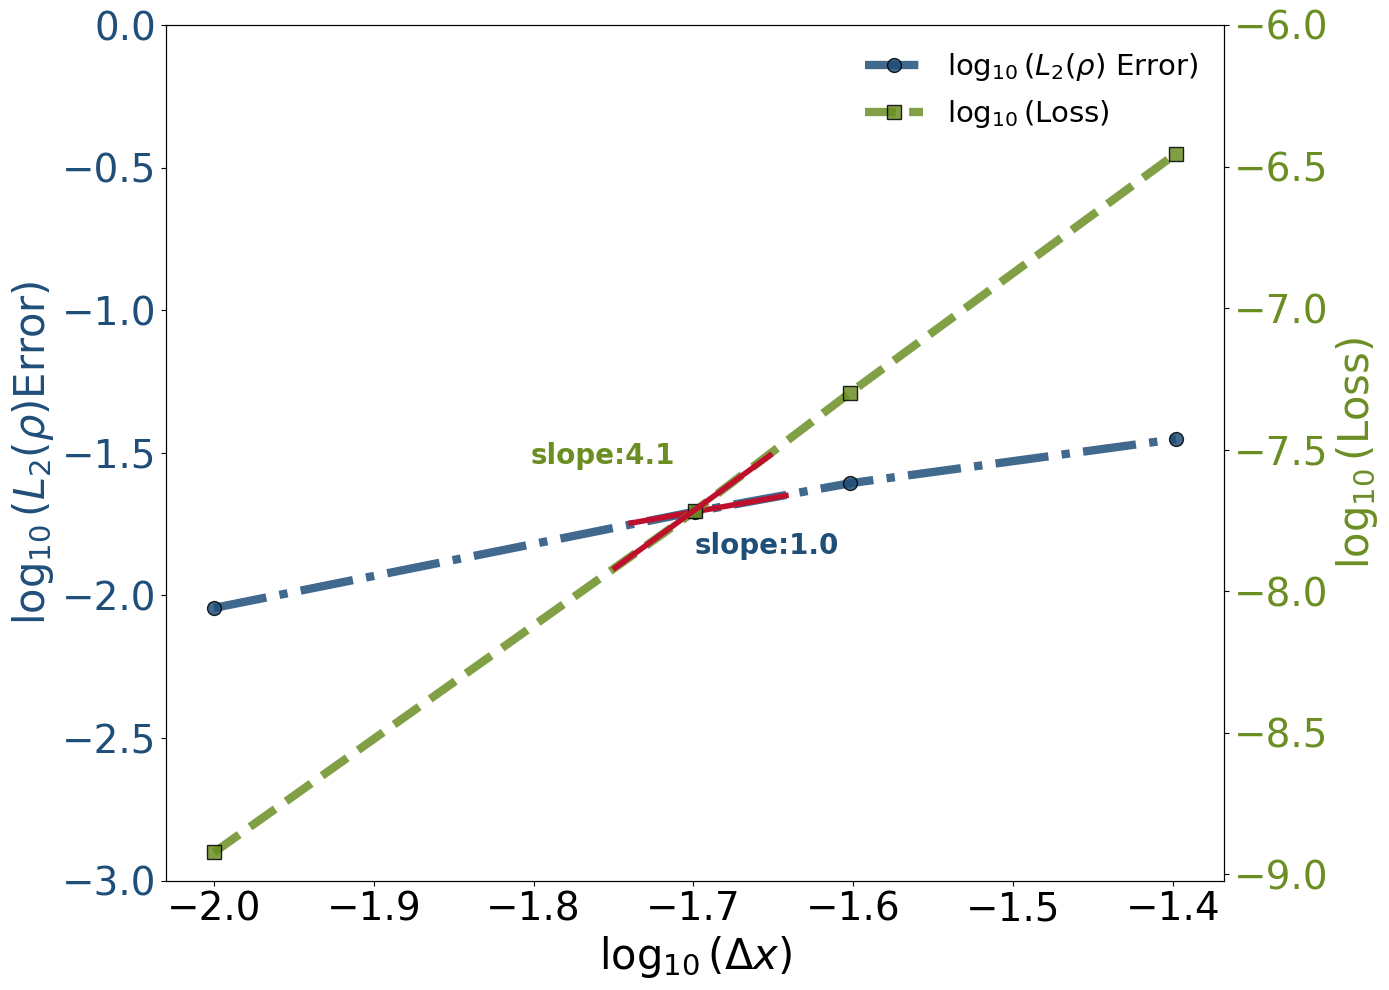

In [52]:
mid_idx = slice(1, 3)         # 对应 dxlist1[1], dxlist1[2]
dx_mid = dxlist1_log[mid_idx]

# 转为 ndarray
dx_list = np.array(dxlist1_log, dtype=float)
dx_mid   = np.array(dx_mid,   dtype=float)

# 计算原拟合值
y_fit_err_mid_log  = slope_err_log  * dx_mid + intercept_err_log
y_fit_loss_mid_log = slope_loss_log * dx_mid + intercept_loss_log

# 全局样式
plt.rcParams.update({
    "figure.figsize": (14, 10),
    "xtick.labelsize": 28,
    "ytick.labelsize": 28,
    "legend.fontsize": 21,
})

# 创建主图及双 y 轴
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 配色与样式
colors      = ['#1f4e79', '#6B8E23']
linestyles  = ['-.', '--']
markers     = ['o', 's']
linewidth_v = 6

# 绘制 log10(Error)
ax1.plot(dxlist1_log, error_log,
         color=colors[0], linestyle=linestyles[0],
         linewidth=linewidth_v, alpha=0.85,
         marker=markers[0], markersize=10, markeredgecolor='black',
         label=r'$\log_{10}(L_2(\rho)\ \mathrm{Error})$')

# 绘制 log10(Loss)
ax2.plot(dxlist1_log, loss_log,
         color=colors[1], linestyle=linestyles[1],
         linewidth=linewidth_v, alpha=0.85,
         marker=markers[1], markersize=10, markeredgecolor='black',
         label=r'$\log_{10}(\mathrm{Loss})$')

# 在中段画短拟合线（log10 版）
ax1.plot(dx_mid-0.04, y_fit_err_mid_log-0.02,
         color='#be0f2d', linestyle='-', linewidth=4) #  label=rf'Fit$_{{err}}$: $slope={slope_err_log:.1e}$'
ax2.plot(dx_mid-0.05, y_fit_loss_mid_log-0.22,
         color='#be0f2d', linestyle='-', linewidth=4) #label=rf'Fit$_{{loss}}$: $slope={slope_loss_log:.1e}$'

err_shift = -0.13
loss_shift = 0.25
x_shift = 0.1
x_text_err = dx_mid[0] - x_shift +0.1
y_text_err = y_fit_err_mid_log[0] + err_shift 
ax1.text(x_text_err, y_text_err,
         rf'slope:{slope_err_log.round(2)}', color=colors[0], fontsize=20, fontweight='bold')

x_text_loss = dx_mid[1] - x_shift -0.1
y_text_loss = y_fit_loss_mid_log[1] - loss_shift
ax2.text(x_text_loss, y_text_loss,
         rf'slope:{slope_loss_log.round(2)}', color=colors[1], fontsize=20, fontweight='bold')

# Labels
ax1.set_xlabel(r'$\log_{10}(\Delta x)$', fontsize=30, fontweight='bold') #= \{\log_{10}(0.01), \log_{10}(0.02), \log_{10}(0.025), \log_{10}(0.04)\}
ax1.set_ylabel(r'$\log_{10}(L_2(\rho)\mathrm{Error})$', fontsize=30, fontweight='bold', color=colors[0])
ax2.set_ylabel(r'$\log_{10}(\mathrm{Loss})$', fontsize=30, fontweight='bold', color=colors[1])

# 轴从 min(log) 开始
ax1.set_ylim(bottom=np.min(error_log) - 0.1)
ax2.set_ylim(bottom=np.min(loss_log)  - 0.1)

y1min, y1max = ax1.get_ylim()
ticks1 = np.arange(-3,0.5,0.5)

y2min, y2max = ax2.get_ylim()
ticks2 = np.arange(-9,-5.5,0.5)
ax1.set_yticks(ticks1)
ax2.set_yticks(ticks2)

# 刻度样式
ax1.tick_params(axis='x', labelsize=28)
ax1.tick_params(axis='y', labelsize=28, labelcolor=colors[0])
ax2.tick_params(axis='y', labelsize=28, labelcolor=colors[1])

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper right', fontsize=21)

# 网格
#ax1.grid(True, linestyle='--', alpha=0.6, color='gray')

plt.tight_layout()

figure_path = os.path.join(add_mypathlevy.figure_folder, f"Sinx{kernel_type}AllLossErrordx{dx_coarse1}N{N}.pdf")
plt.savefig(figure_path, bbox_inches='tight', dpi=500)

plt.show()